In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.float_format", "{:.2f}".format)

# Load dataset
file_path = "C://Users//Khushali//Downloads//finance_economics_dataset (1).csv"
df = pd.read_csv(file_path)

# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

df


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [ ]:
#1. What is the shape of the dataset?
df.shape


(3000, 24)

In [ ]:
#2. What are the column names and their data types?
df.dtypes


Date                                     datetime64[ns]
Stock Index                                      object
Open Price                                      float64
Close Price                                     float64
Daily High                                      float64
Daily Low                                       float64
Trading Volume                                    int64
GDP Growth (%)                                  float64
Inflation Rate (%)                              float64
Unemployment Rate (%)                           float64
Interest Rate (%)                               float64
Consumer Confidence Index                         int64
Government Debt (Billion USD)                     int64
Corporate Profits (Billion USD)                   int64
Forex USD/EUR                                   float64
Forex USD/JPY                                   float64
Crude Oil Price (USD per Barrel)                float64
Gold Price (USD per Ounce)                      

In [ ]:
#3. How many unique stock indices are there?
df["Stock Index"].nunique

<bound method IndexOpsMixin.nunique of 0       Dow Jones
1         S&P 500
2       Dow Jones
3       Dow Jones
4         S&P 500
          ...    
2995    Dow Jones
2996      S&P 500
2997      S&P 500
2998       NASDAQ
2999       NASDAQ
Name: Stock Index, Length: 3000, dtype: object>

In [7]:
#4. What is the date range of the dataset?
df["Date"].min
df["Date"].max

<bound method Series.max of 0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
2995   2008-03-14
2996   2008-03-15
2997   2008-03-16
2998   2008-03-17
2999   2008-03-18
Name: Date, Length: 3000, dtype: datetime64[ns]>

In [9]:
#5. Are there any missing values?

df.isna().sum()


Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [11]:
#6. Are there negative values in columns that should be non-negative?
(df.select_dtypes(include=np.number) < 0).sum()

(df.select_dtypes(include=np.number)>0).sum()


Open Price                               3000
Close Price                              3000
Daily High                               3000
Daily Low                                3000
Trading Volume                           3000
GDP Growth (%)                           2052
Inflation Rate (%)                       3000
Unemployment Rate (%)                    3000
Interest Rate (%)                        3000
Consumer Confidence Index                3000
Government Debt (Billion USD)            3000
Corporate Profits (Billion USD)          3000
Forex USD/EUR                            3000
Forex USD/JPY                            3000
Crude Oil Price (USD per Barrel)         3000
Gold Price (USD per Ounce)               3000
Real Estate Index                        3000
Retail Sales (Billion USD)               3000
Bankruptcy Rate (%)                      3000
Mergers & Acquisitions Deals             2953
Venture Capital Funding (Billion USD)    3000
Consumer Spending (Billion USD)   

In [12]:
#7. What is the summary of GDP Growth (%)?
df["GDP Growth (%)"].describe()

count   3000.00
mean       2.61
std        4.29
min       -5.00
25%       -1.01
50%        2.73
75%        6.24
max       10.00
Name: GDP Growth (%), dtype: float64

In [15]:
# 8. Are there rows with zero or near-zero trading volume?
(df["Trading Volume"]<=0).sum()

np.int64(0)

In [17]:
# 9. Are there any duplicate rows?
df.duplicated().sum()


np.int64(0)

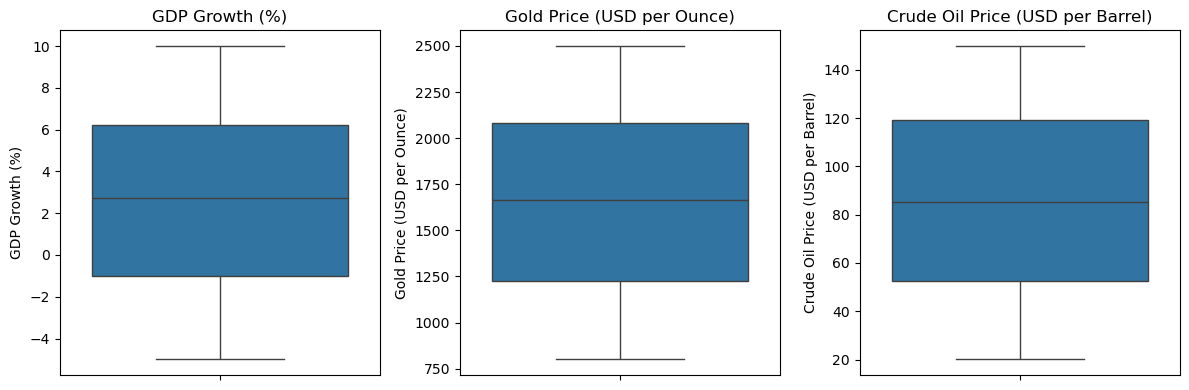

In [18]:
columns = [
    "GDP Growth (%)",
    "Gold Price (USD per Ounce)",
    "Crude Oil Price (USD per Barrel)"
]

plt.figure(figsize=(12,4))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [19]:
# 11. What is the summary of Inflation Rate (%)?
df["Inflation Rate (%)"].describe()


count   3000.00
mean       5.10
std        2.91
min        0.01
25%        2.61
50%        5.11
75%        7.60
max       10.00
Name: Inflation Rate (%), dtype: float64

In [21]:
# 12 12. What is the average unemployment rate?

df["Unemployment Rate (%)"].mean()

np.float64(8.663786666666667)

In [22]:
df.groupby("Stock Index")["Trading Volume"].idxmax()

Stock Index
Dow Jones    1639
NASDAQ       1092
S&P 500       641
Name: Trading Volume, dtype: int64

In [23]:
df["Stock Index"].value_counts()

Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Name: count, dtype: int64

In [25]:
# 15. What is the correlation between inflation and interest rate?
df[["Inflation Rate (%)" , "Interest Rate (%)"]].corr()

,Inflation Rate (%),Interest Rate (%)
Inflation Rate (%),1.00,0.01
Interest Rate (%),0.01,1.00


In [26]:
# 16. What is the average Consumer Confidence Index?
df["Consumer Confidence Index"].mean()

np.float64(85.036)

In [27]:
#17. Which column has the highest standard deviation?

df.std(numeric_only=True).sort_values(ascending=False).head(1)
df.std(numeric_only=True).sort_values(ascending=False)

Trading Volume                          285900426.37
Government Debt (Billion USD)                8524.23
Consumer Spending (Billion USD)              4203.71
Retail Sales (Billion USD)                   2898.71
Corporate Profits (Billion USD)              1429.98
Open Price                                   1151.86
Daily Low                                    1151.83
Close Price                                  1151.78
Daily High                                   1151.68
Gold Price (USD per Ounce)                    492.18
Real Estate Index                             114.60
Crude Oil Price (USD per Barrel)               37.85
Venture Capital Funding (Billion USD)          28.72
Consumer Confidence Index                      20.22
Forex USD/JPY                                  20.11
Mergers & Acquisitions Deals                   14.30
GDP Growth (%)                                  4.29
Unemployment Rate (%)                           3.74
Inflation Rate (%)                            

In [28]:
#18. What is the highest gold price recorded?

df["Gold Price (USD per Ounce)"].max()


2499.66

In [29]:
#19. Which date had the highest crude oil price?
df.loc[df["Crude Oil Price (USD per Barrel)"].idxmax()][
    ["Date", "Crude Oil Price (USD per Barrel)"]
]


Date                                2001-11-22 00:00:00
Crude Oil Price (USD per Barrel)                 149.87
Name: 691, dtype: object

In [30]:
#20. What is the average corporate profit?
df["Corporate Profits (Billion USD)"].mean()


np.float64(2553.7563333333333)